In [81]:
import pandas as pd


In [82]:
df=pd.read_csv('data/gemstone.csv')

In [83]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [103]:
categorical_col= df.columns[df.dtypes=='object']
numerical_col= df.columns[df.dtypes!='object']
categorical_col
numerical_col

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [104]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [105]:
df[numerical_col].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [111]:
# id is unique value in the dataset it has not much impact on dataset
df = df.drop('id', axis = 1)
df

In [107]:
df[categorical_col].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [108]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [109]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
193568    False
193569    False
193570    False
193571    False
193572    False
Length: 193573, dtype: bool

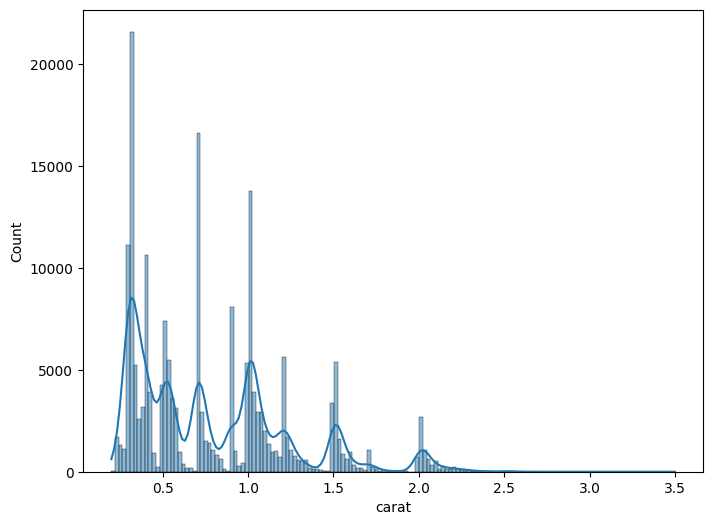

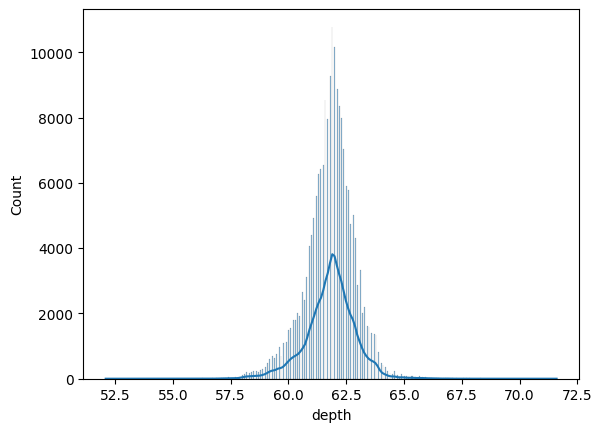

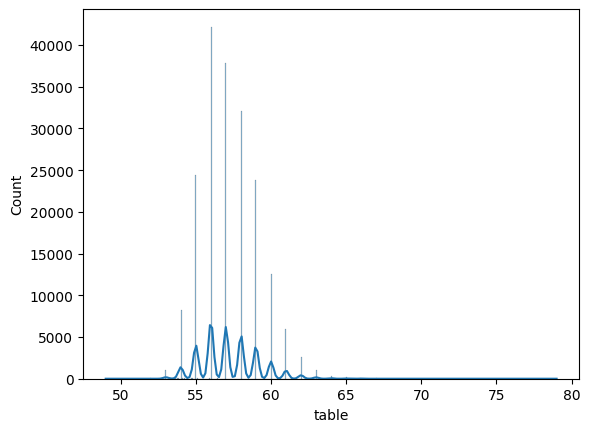

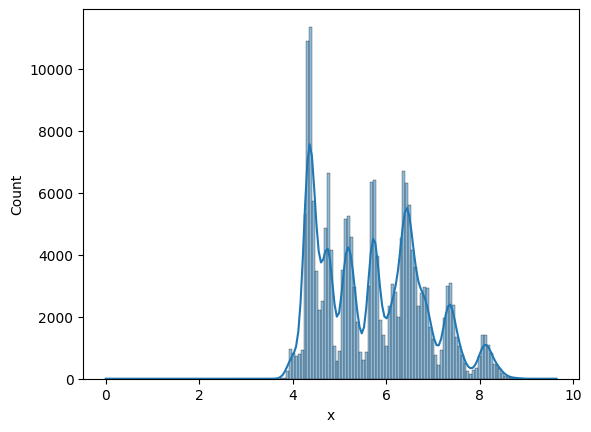

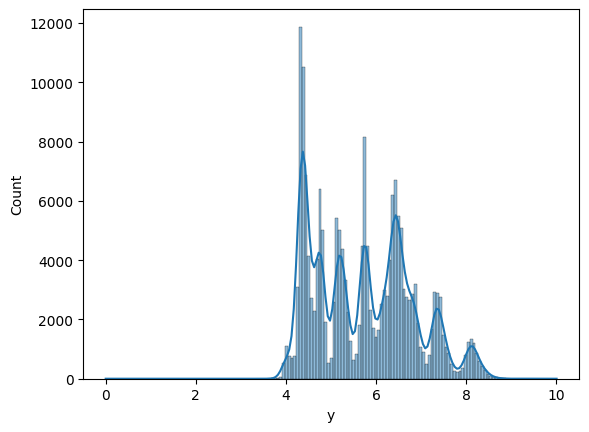

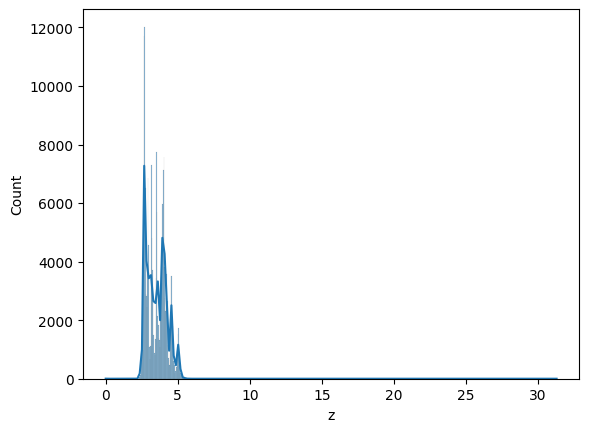

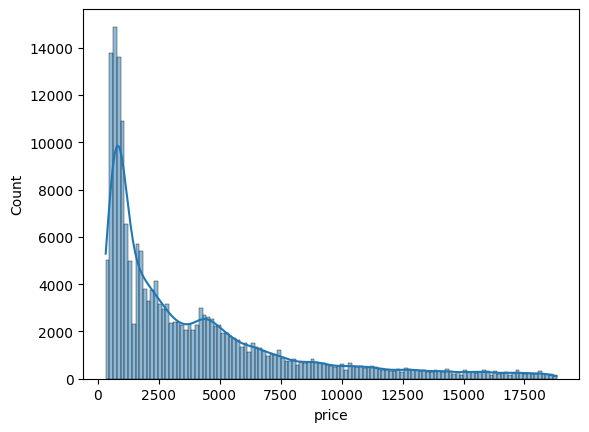

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_col:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [125]:
categorical_col


['cut', 'color', 'clarity']

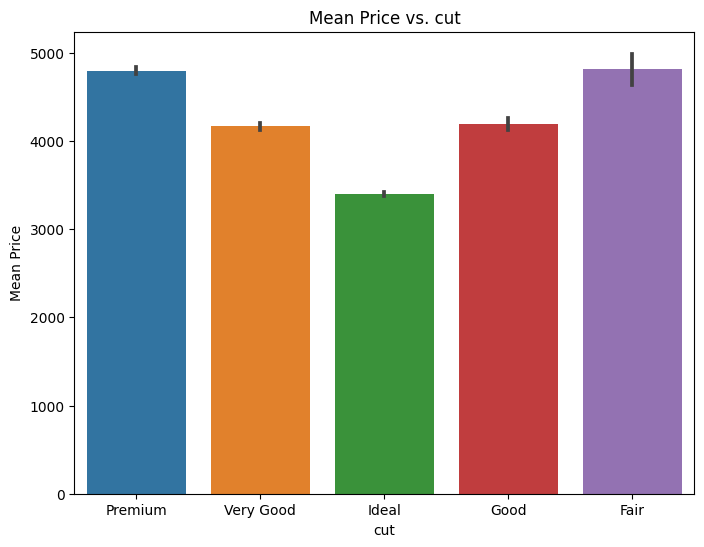

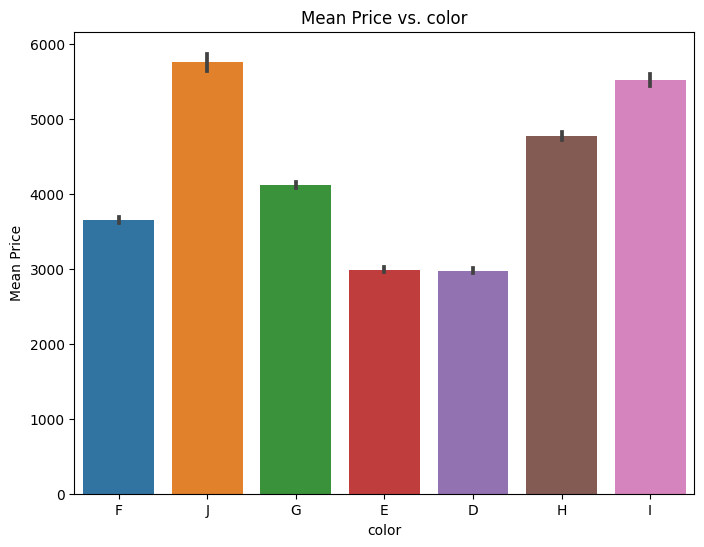

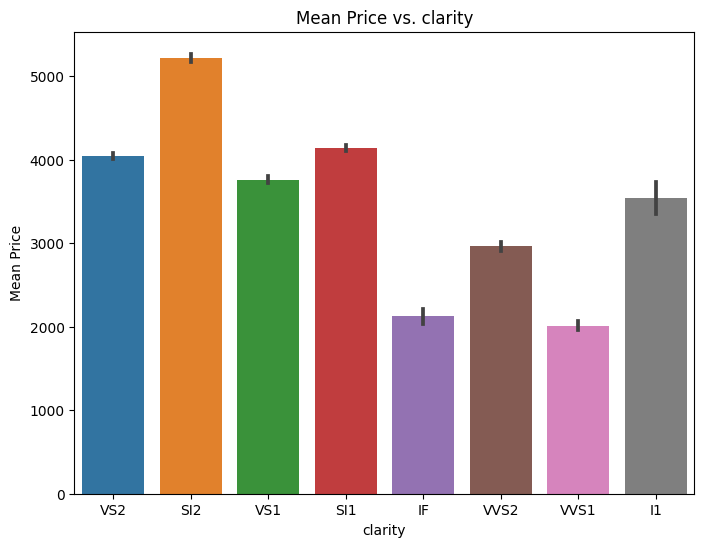

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create multiple bar plots for each categorical column
for col in categorical_col:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=col, y='price', data=df, estimator='mean')
    plt.xlabel(col)
    plt.ylabel('Mean Price')
    plt.title(f'Mean Price vs. {col}')
    plt.show()


<Axes: >

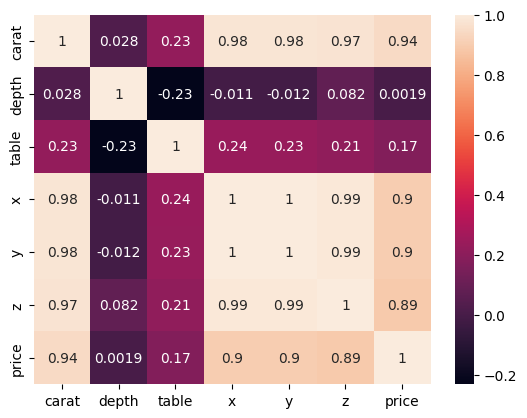

In [136]:
# corelation 
# If the featues are more corelated then we need to drop one of the column from corelated columns
sns.heatmap(df[numerical_col].corr(), annot = True)


In [133]:
df[numerical_col].dtypes == 'object'

carat    False
depth    False
table    False
x        False
y        False
z        False
price    False
dtype: bool